In [31]:
import scipy.io as sio
from scipy import signal
from scipy.stats import pearsonr
from scipy.spatial.distance import euclidean
from sklearn.metrics import mean_squared_error as mse
import os
import numpy as np

from sklearn import preprocessing
from tftb.processing import Scalogram
from tftb.generators import fmconst
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
voltage = sio.loadmat('../../datasets/CS2019_02_08/Voltage.mat')
stator_plus = sio.loadmat('../../datasets/CS2019_02_08/StatorPuls.mat')
speed = sio.loadmat('../../datasets/CS2019_02_08/Speed.mat')
time = sio.loadmat('../../datasets/CS2019_02_08/t.mat')

In [33]:
current = sio.loadmat('../../datasets/CS2018_12_14/Current.mat')
voltage = sio.loadmat('../../datasets/CS2018_12_14/Voltage.mat')
stator_plus = sio.loadmat('../../datasets/CS2018_12_14/StatorPuls.mat')
speed = sio.loadmat('../../datasets/CS2018_12_14/Speed.mat')
torque = sio.loadmat('../../datasets/CS2018_12_14/Torque.mat')

In [34]:
dataset = np.hstack((voltage['Voltage'], stator_plus['StatorPuls'], speed['Speed'], current['Current'], torque['Torque']))
dataset_scaled = np.copy(dataset)

In [35]:
current1_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
current1_scaler.fit(dataset_scaled[:,4:5])

current2_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
current2_scaler.fit(dataset_scaled[:,5:6])

torque_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
torque_scaler.fit(dataset_scaled[:,6:7])

MinMaxScaler(copy=True, feature_range=[0, 1])

In [50]:
id_res = np.load('../../results/CS2019_02_08/model_encdec_bilstm_skip_act_tanh_stride_1_window_100_inp_quants_StatorPuls,Speed_out_quants_Current1_lr_0.001_batch_size_128_epochs_200.npy')
iq_res = np.load('../../results/CS2019_02_08/model_encdec_bilstm_skip_act_tanh_stride_1_window_100_inp_quants_StatorPuls,Speed_out_quants_Current2_lr_0.001_batch_size_128_epochs_200.npy')
t_res = np.load('../../results/CS2019_02_08/model_encdec_bilstm_skip_act_tanh_stride_1_window_100_inp_quants_StatorPuls,Speed_out_quants_Torque_lr_0.001_batch_size_128_epochs_200.npy')
time = np.load('../../results/CS2019_02_08/time.npy')

In [39]:
id_pred = current1_scaler.inverse_transform(id_res.reshape(-1,1)).flatten()
iq_pred = current2_scaler.inverse_transform(iq_res.reshape(-1,1)).flatten()
t_pred = torque_scaler.inverse_transform(t_res.reshape(-1,1)).flatten()

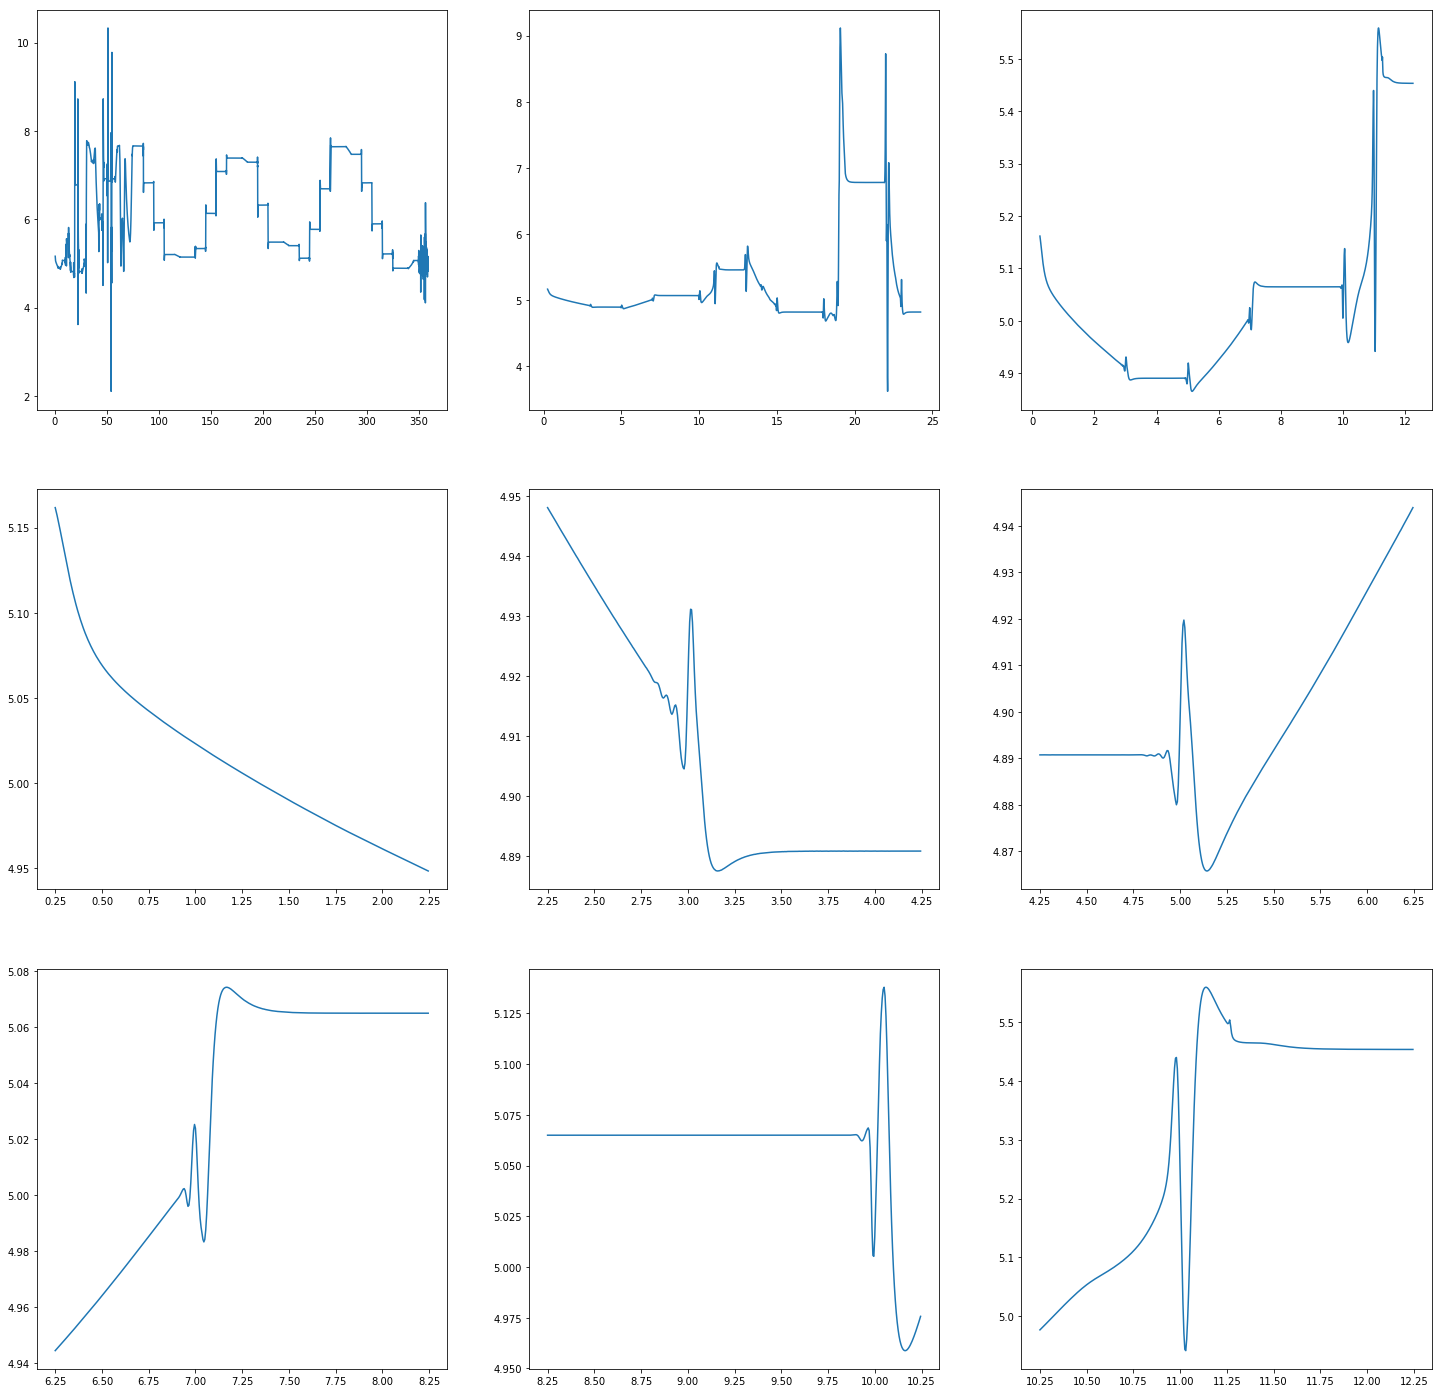

In [51]:
f = plt.figure(figsize=(25,25))

f.add_subplot(3,3,1)
plt.plot(time, id_pred[:])

f.add_subplot(3,3,2)
plt.plot(time[:int(24/0.005)], id_pred[:int(24/0.005)])

f.add_subplot(3,3,3)
plt.plot(time[:int(12/0.005)], id_pred[:int(12/0.005)])

f.add_subplot(3,3,4)
plt.plot(time[:int(2/0.005)], id_pred[:int(2/0.005)])

f.add_subplot(3,3,5)
plt.plot(time[int(2/0.005):int(4/0.005)], id_pred[int(2/0.005):int(4/0.005)])

f.add_subplot(3,3,6)
plt.plot(time[int(4/0.005):int(6/0.005)], id_pred[int(4/0.005):int(6/0.005)])

f.add_subplot(3,3,7)
plt.plot(time[int(6/0.005):int(8/0.005)], id_pred[int(6/0.005):int(8/0.005)])

f.add_subplot(3,3,8)
plt.plot(time[int(8/0.005):int(10/0.005)], id_pred[int(8/0.005):int(10/0.005)])

f.add_subplot(3,3,9)
plt.plot(time[int(10/0.005):int(12/0.005)], id_pred[int(10/0.005):int(12/0.005)])

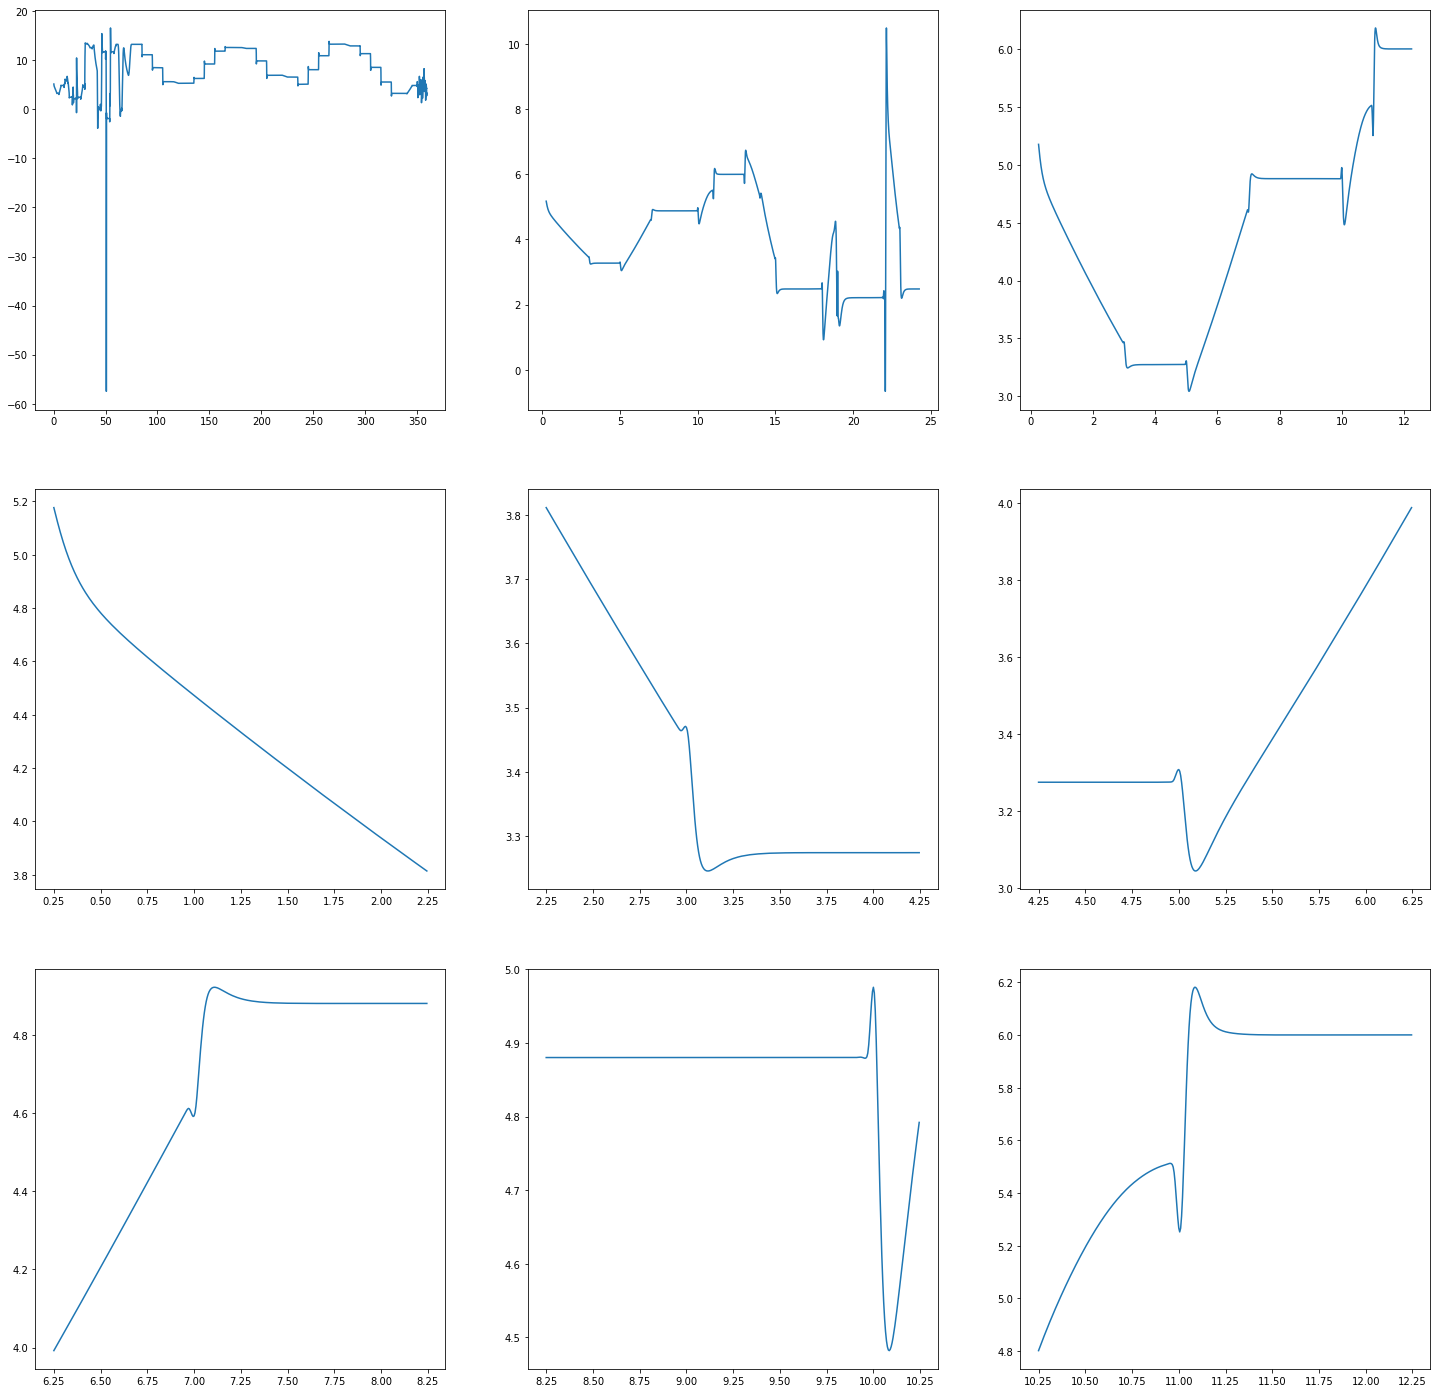

In [52]:
f = plt.figure(figsize=(25,25))

f.add_subplot(3,3,1)
plt.plot(time, iq_pred[:])

f.add_subplot(3,3,2)
plt.plot(time[:int(24/0.005)], iq_pred[:int(24/0.005)])

f.add_subplot(3,3,3)
plt.plot(time[:int(12/0.005)], iq_pred[:int(12/0.005)])

f.add_subplot(3,3,4)
plt.plot(time[:int(2/0.005)], iq_pred[:int(2/0.005)])

f.add_subplot(3,3,5)
plt.plot(time[int(2/0.005):int(4/0.005)], iq_pred[int(2/0.005):int(4/0.005)])

f.add_subplot(3,3,6)
plt.plot(time[int(4/0.005):int(6/0.005)], iq_pred[int(4/0.005):int(6/0.005)])

f.add_subplot(3,3,7)
plt.plot(time[int(6/0.005):int(8/0.005)], iq_pred[int(6/0.005):int(8/0.005)])

f.add_subplot(3,3,8)
plt.plot(time[int(8/0.005):int(10/0.005)], iq_pred[int(8/0.005):int(10/0.005)])

f.add_subplot(3,3,9)
plt.plot(time[int(10/0.005):int(12/0.005)], iq_pred[int(10/0.005):int(12/0.005)])

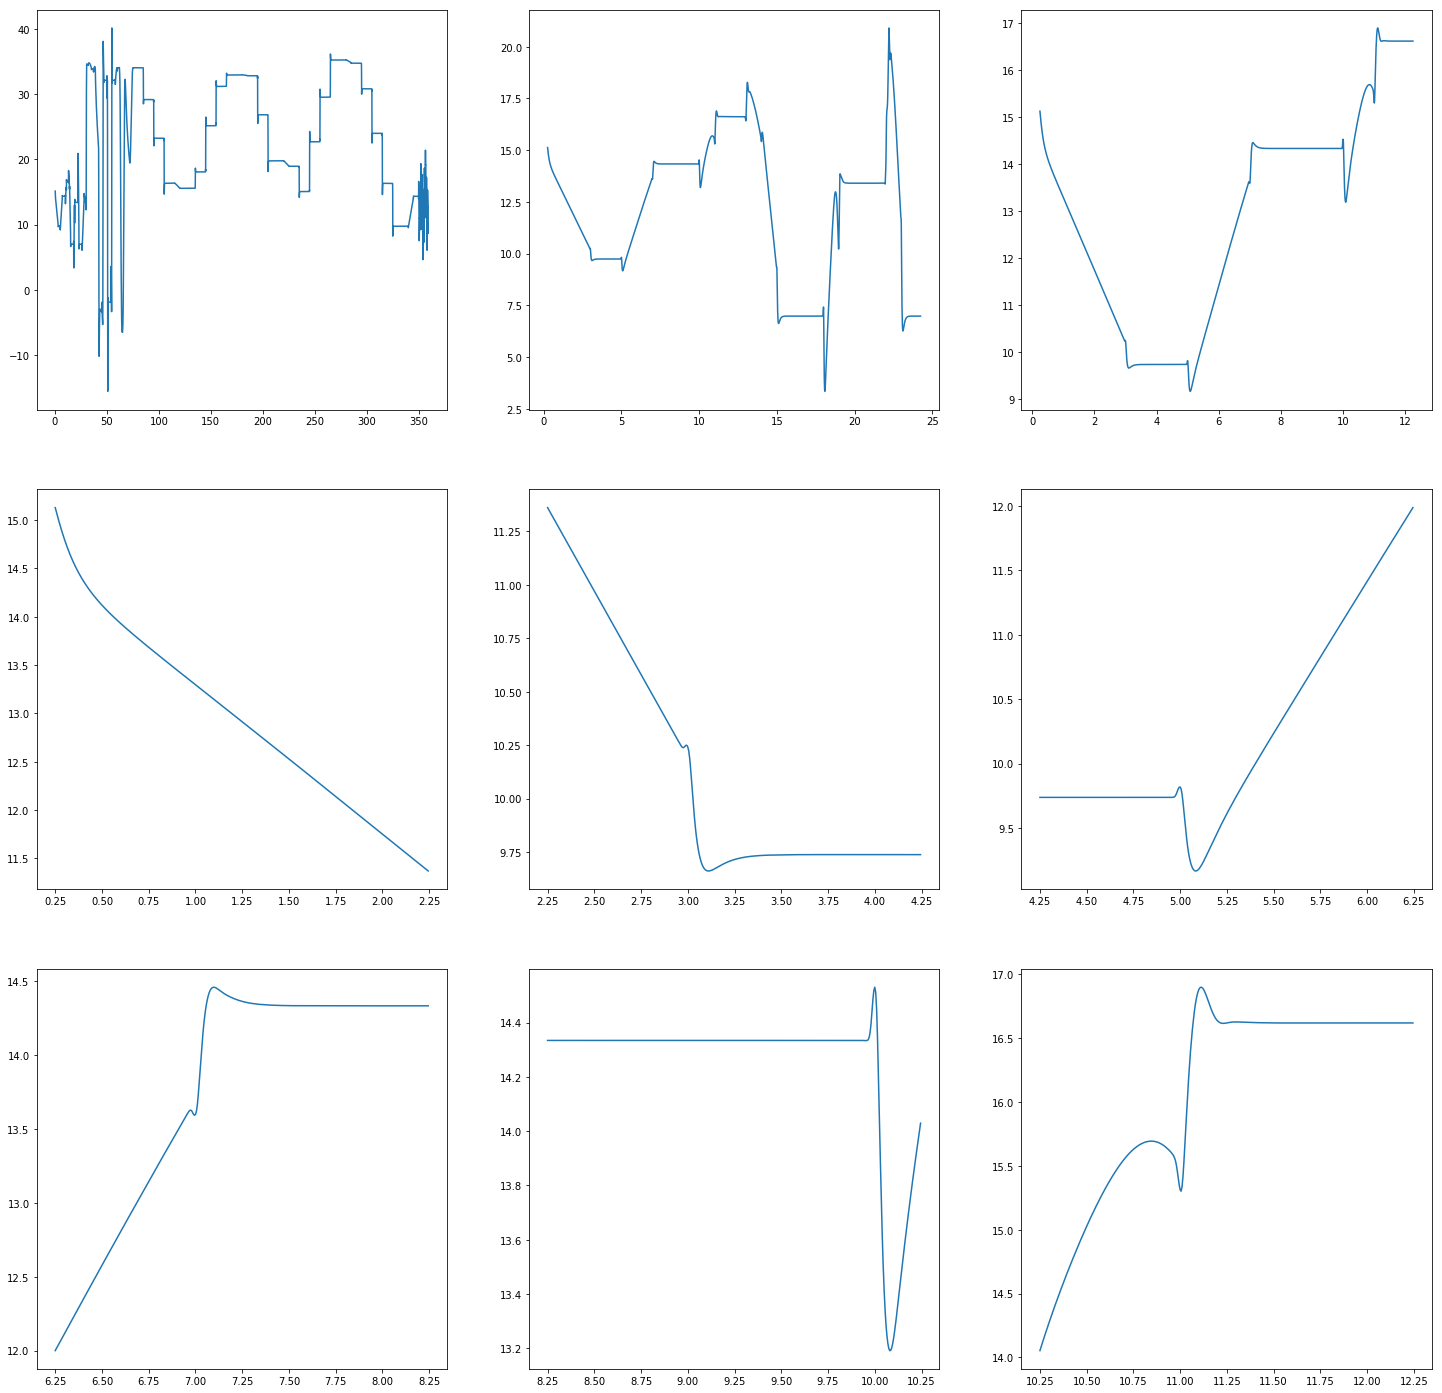

In [53]:
f = plt.figure(figsize=(25,25))

f.add_subplot(3,3,1)
plt.plot(time, t_pred[:])

f.add_subplot(3,3,2)
plt.plot(time[:int(24/0.005)], t_pred[:int(24/0.005)])

f.add_subplot(3,3,3)
plt.plot(time[:int(12/0.005)], t_pred[:int(12/0.005)])

f.add_subplot(3,3,4)
plt.plot(time[:int(2/0.005)], t_pred[:int(2/0.005)])

f.add_subplot(3,3,5)
plt.plot(time[int(2/0.005):int(4/0.005)], t_pred[int(2/0.005):int(4/0.005)])

f.add_subplot(3,3,6)
plt.plot(time[int(4/0.005):int(6/0.005)], t_pred[int(4/0.005):int(6/0.005)])

f.add_subplot(3,3,7)
plt.plot(time[int(6/0.005):int(8/0.005)], t_pred[int(6/0.005):int(8/0.005)])

f.add_subplot(3,3,8)
plt.plot(time[int(8/0.005):int(10/0.005)], t_pred[int(8/0.005):int(10/0.005)])

f.add_subplot(3,3,9)
plt.plot(time[int(10/0.005):int(12/0.005)], t_pred[int(10/0.005):int(12/0.005)])

In [54]:
sio.savemat('../../datasets/CS2019_02_08/currentd_pred.mat', {'id_pred': id_pred, 'time': time})
sio.savemat('../../datasets/CS2019_02_08/currentq_pred.mat', {'iq_pred': iq_pred, 'time': time})
sio.savemat('../../datasets/CS2019_02_08/torque_pred.mat', {'t_pred': t_pred, 'time': time})